# Data Demo
In this notebook we display all the data need it for the platform. 

The data is also compiled together with the narrative in [this document](https://docs.google.com/document/d/1D5qpHKlfLvYt0Tu6EGf2ami0Od7KIjohb6SEDw66kDg/edit#).

# Setup
## Library import
We import all the required Python libraries

In [3]:
import ast
import folium
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Data import

## Comarcas Agrarias
**[Data source](https://www.mapa.gob.es/es/cartografia-y-sig/ide/descargas/agricultura/)**

In [4]:
comarcas_agr = gpd.read_file(f'../../datasets/raw/georegions/ComarcasAgrarias/ComarcasAgrarias.shp')
comarcas_agr.sort_values(['CO_CCAA', 'CO_PROVINC', 'CO_COMARCA'], inplace = True)

# Remove Canarias, Ceuta, and Melilla
comarcas_agr = comarcas_agr[~comarcas_agr['DS_CCAA'].isin(['Canarias', 'Ceuta', 'Melilla'])]
comarcas_agr = comarcas_agr.reset_index(drop=True)

## Municipios de España
**[Data source](https://opendata.esri.es/datasets/53229f5912e04f1ba6dddb70a5abeb72_0/explore?location=43.017075%2C9.288571%2C5.20)**

In [5]:
municipios = gpd.read_file(f'../../datasets/raw/georegions/Municipios/Municipios_IGN.shp')
municipios.sort_values(['CODNUT1', 'CODNUT2', 'CODNUT3', 'CODIGOINE'], inplace = True)

# Remove Canarias, Ceuta, and Melilla
municipios = municipios[~municipios['CODNUT2'].isin(['ES70', 'ES63', 'ES64'])]
municipios = municipios.reset_index(drop=True)

# Data visualization

## Emisiones por municipio

In [6]:
df = pd.read_csv('../../datasets/processed/CO2_emissions_municipios.csv')
df = df.astype({'CODIGOINE':int})
gdf = df[df['indicator'] == 'CO2_emissions'].astype({'value': 'float64'})
gdf = gpd.GeoDataFrame(pd.merge(gdf, municipios[['CODIGOINE', 'geometry']].astype({'CODIGOINE':int}), how='left', on='CODIGOINE'))
gdf.head()

,CODIGOINE,dataset,indicator,scenario,value,year,unit,geometry
0,15001,OpenGHGMap,CO2_emissions,NaN,165448.0,2018,t,"POLYGON ((-8.35892 43.14721, -8.35864 43.14764..."
1,15002,OpenGHGMap,CO2_emissions,NaN,43288.0,2018,t,"POLYGON ((-8.72471 42.88868, -8.72403 42.88872..."
2,15003,OpenGHGMap,CO2_emissions,NaN,64922.0,2018,t,"POLYGON ((-8.11605 43.21256, -8.11120 43.21299..."
3,15004,OpenGHGMap,CO2_emissions,NaN,85412.0,2018,t,"MULTIPOLYGON (((-8.26941 43.42891, -8.26951 43..."
4,15005,OpenGHGMap,CO2_emissions,NaN,1117753.0,2018,t,"MULTIPOLYGON (((-8.55475 43.31382, -8.55483 43..."


**Mapa**

Text(0.5, 1.0, 'Emisiones de CO2 por municipio [t CO2]')

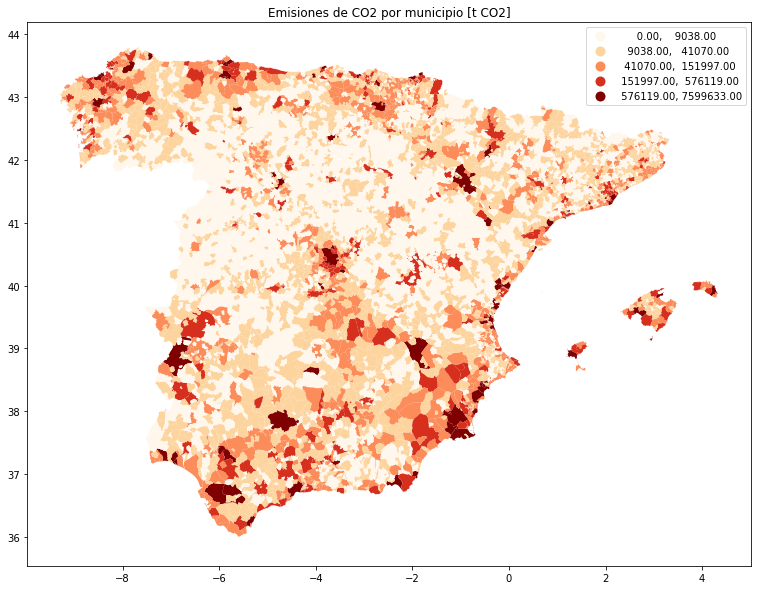

In [7]:
fig, ax = plt.subplots(1,1,figsize=(20,10))

gdf.plot(ax=ax, column='value', cmap='OrRd', scheme='jenkscaspall', legend=True)
ax.set_title('Emisiones de CO2 por municipio [t CO2]')

**Tooltip**

In [8]:
df_cat = df[df['indicator'] == 'emissions_by_category']
df_cat = gpd.GeoDataFrame(pd.merge(df_cat, municipios[['CODIGOINE', 'NAMEUNIT']].astype({'CODIGOINE':int}), how='left', on='CODIGOINE'))
cats = ast.literal_eval(df_cat[df_cat['NAMEUNIT'] == 'Málaga']['value'].iloc[0])

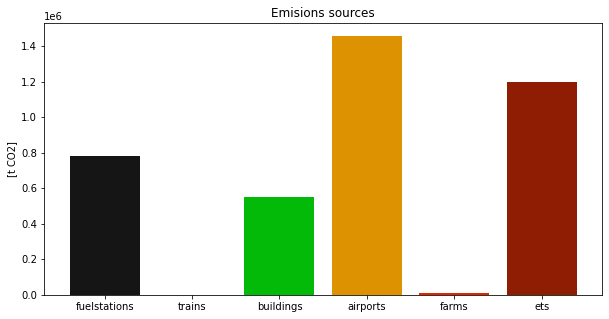

In [9]:
# Data
categories = list(cats.keys())
values = list(cats.values())
c = ["#151515", "#337735", "#04BA09", "#DD9201", "#DD2901", "#8F1D03"]

plt.figure(figsize=(10,5))

# Plot
plt.bar(categories, values, color = c)
 
plt.title('Emisions sources')
plt.ylabel('[t CO2]')

plt.show()

## Aumento de temperaturas proyectadas por municipio

In [10]:
indicator = 'mean_Tmean_Yearly_change'
scenario = 'rcp85'
year = '2065 - 2095'

In [11]:
df = pd.read_csv('../../datasets/processed/climate_indicators_municipios.csv')
df = df.astype({'CODIGOINE':int})
gdf = df[(df['indicator'] == indicator) & (df['scenario'] == scenario) & (df['year'] == year)]
gdf = gpd.GeoDataFrame(pd.merge(gdf, municipios[['CODIGOINE', 'geometry']].astype({'CODIGOINE':int}), how='left', on='CODIGOINE'))
gdf.head()

,CODIGOINE,dataset,indicator,scenario,value,year,unit,geometry
0,15001,Temperature statistics and heat waves,mean_Tmean_Yearly_change,rcp85,2.890699,2065 - 2095,ºC,"POLYGON ((-8.35892 43.14721, -8.35864 43.14764..."
1,15002,Temperature statistics and heat waves,mean_Tmean_Yearly_change,rcp85,2.952255,2065 - 2095,ºC,"POLYGON ((-8.72471 42.88868, -8.72403 42.88872..."
2,15003,Temperature statistics and heat waves,mean_Tmean_Yearly_change,rcp85,2.946671,2065 - 2095,ºC,"POLYGON ((-8.11605 43.21256, -8.11120 43.21299..."
3,15004,Temperature statistics and heat waves,mean_Tmean_Yearly_change,rcp85,2.734466,2065 - 2095,ºC,"MULTIPOLYGON (((-8.26941 43.42891, -8.26951 43..."
4,15005,Temperature statistics and heat waves,mean_Tmean_Yearly_change,rcp85,2.689627,2065 - 2095,ºC,"MULTIPOLYGON (((-8.55475 43.31382, -8.55483 43..."


Text(0.5, 1.0, 'time = 2065 - 2095, scenario = rcp85')

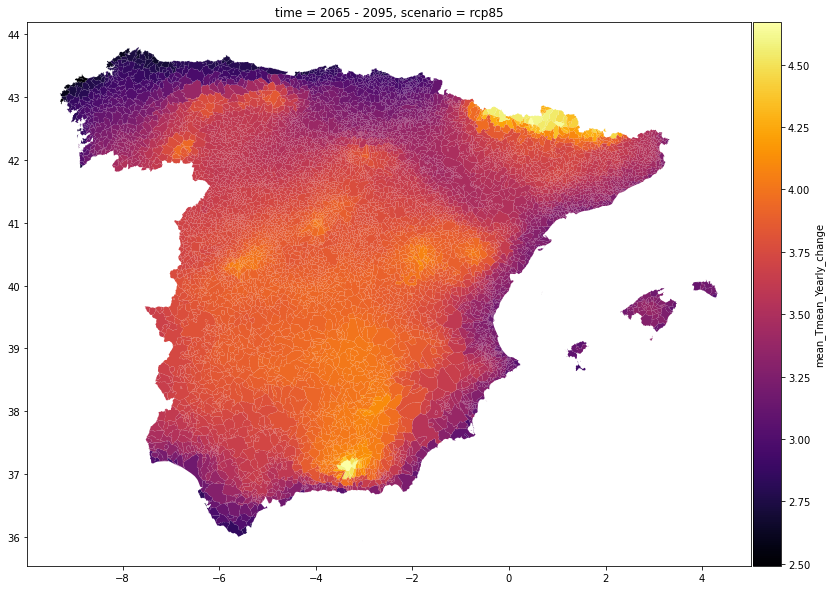

In [36]:
fig, ax = plt.subplots(1,1,figsize=(20, 10))


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=-1.5) 
gdf.plot(ax=ax, column='value', cmap='inferno', legend=True, cax=cax, legend_kwds={'label': indicator})
ax.set_title(f'time = {year}, scenario = {scenario}')

[Improve with folium](https://github.com/python-visualization/folium/blob/master/examples/GeoJSON_and_choropleth.ipynb)

In [38]:
#m = folium.Map([40, -4], zoom_start=4)
#
#folium.GeoJson(
#    gdf,
#).add_to(m)
#
#m

## Evolución de temperatura en España

In [39]:
df = pd.read_csv(f'../../datasets/processed/annual_average_temperature_spain.csv')

Text(0, 0.5, 'Temperatura (ºC)')

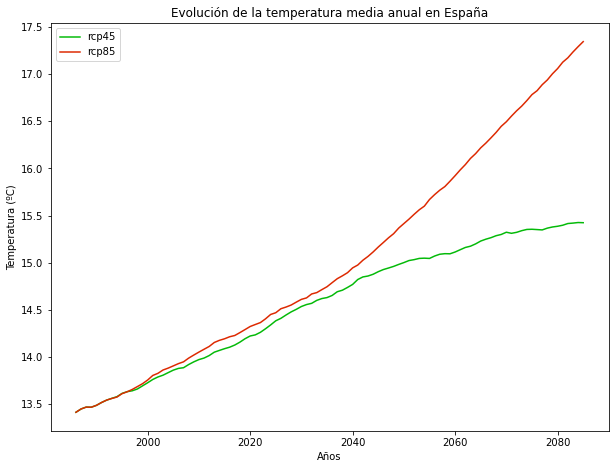

In [43]:
fig, ax = plt.subplots(figsize=(10,7.5))

ax.plot(df[df['scenario'] == 'rcp45']['year'], df[df['scenario'] == 'rcp45']['value'], label='rcp45', color = '#04BA09')
ax.plot(df[df['scenario'] == 'rcp85']['year'], df[df['scenario'] == 'rcp85']['value'], label='rcp85', color = '#DD2901')

# call with no parameters
ax.legend()
ax.set_title('Evolución de la temperatura media anual en España')
ax.set_xlabel('Años')
ax.set_ylabel('Temperatura (ºC)')